In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 2. Normalize Pixel Values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Cek ukuran data untuk memastikan load berhasil
print(f"Ukuran Data Latih: {train_images.shape}")
print(f"Ukuran Data Uji: {test_images.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Ukuran Data Latih: (50000, 32, 32, 3)
Ukuran Data Uji: (10000, 32, 32, 3)


In [ ]:
model_cifar = models.Sequential()

# Blok Konvolusi 1 (Fitur Dasar)
# Input shape 32x32x3 karena gambar berwarna (RGB)
model_cifar.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_cifar.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_cifar.add(layers.MaxPooling2D((2, 2)))
model_cifar.add(layers.Dropout(0.2)) # Mencegah Overfitting

# Blok Konvolusi 2 (Fitur Menengah)
model_cifar.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_cifar.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_cifar.add(layers.MaxPooling2D((2, 2)))
model_cifar.add(layers.Dropout(0.3))

# Blok Konvolusi 3 (Fitur Kompleks)
model_cifar.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_cifar.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_cifar.add(layers.MaxPooling2D((2, 2)))
model_cifar.add(layers.Dropout(0.4))

# Flatten & Dense Layer (Klasifikasi)
model_cifar.add(layers.Flatten())
model_cifar.add(layers.Dense(128, activation='relu'))
model_cifar.add(layers.Dropout(0.5))
model_cifar.add(layers.Dense(10, activation='softmax')) # 10 Kelas Output

# Tampilkan ringkasan model
model_cifar.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_cifar.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Training model
# Epochs ditingkatkan menjadi 20-30 agar model punya waktu belajar pola yang kompleks
print("Mulai Training Model CIFAR-10...")
history_cifar = model_cifar.fit(train_images, train_labels, epochs=20,
                                validation_data=(test_images, test_labels))

# Evaluasi Akurasi
test_loss, test_acc = model_cifar.evaluate(test_images,  test_labels, verbose=2)
print(f"\nAkruasi Testing CIFAR-10: {test_acc*100:.2f}%")

Mulai Training Model CIFAR-10...
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 448s 285ms/step - accuracy: 0.2570 - loss: 1.9623 - val_accuracy: 0.5170 - val_loss: 1.3163
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 461s 295ms/step - accuracy: 0.5061 - loss: 1.3831 - val_accuracy: 0.5779 - val_loss: 1.1891
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 438s 280ms/step - accuracy: 0.5719 - loss: 1.2086 - val_accuracy: 0.6417 - val_loss: 1.0141
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 462s 293ms/step - accuracy: 0.6157 - loss: 1.0906 - val_accuracy: 0.6739 - val_loss: 0.9194
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 439s 281ms/step - accuracy: 0.6415 - loss: 1.0286 - val_accuracy: 0.6968 - val_loss: 0.8751
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 434s 278ms/step - accuracy: 0.6600 - loss: 0.9747 - val_accuracy: 0.7018 - val_loss: 0.8498
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 438s 280ms/step - accuracy: 0.6802 - loss: 0.9257 - val_accuracy: 0.7212 - val_loss: 0.7932
Epoch 8/20
1563/1563 ━━━━━━━━

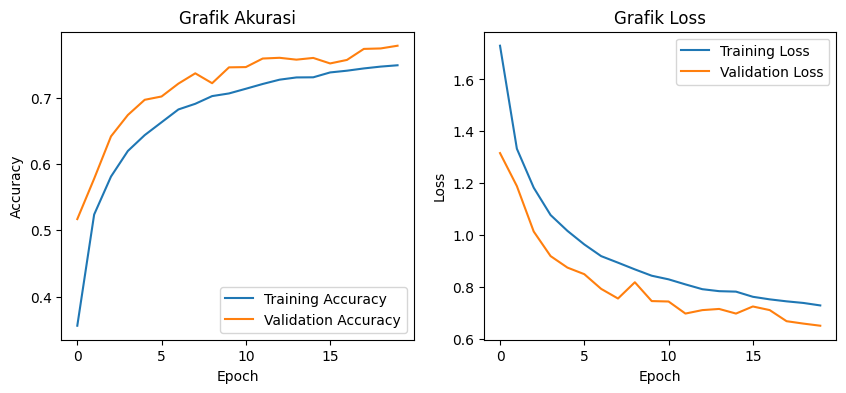

In [ ]:
plt.figure(figsize=(10, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_cifar.history['accuracy'], label='Training Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Grafik Akurasi')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_cifar.history['loss'], label='Training Loss')
plt.plot(history_cifar.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Grafik Loss')

plt.show()

In [ ]:
# 1. Load Dataset MNIST (Angka Tulisan Tangan)
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = datasets.mnist.load_data()

# 2. Preprocessing
# Reshape ke (28, 28, 1) karena MNIST grayscale (1 channel warna)
train_images_mnist = train_images_mnist.reshape((60000, 28, 28, 1))
test_images_mnist = test_images_mnist.reshape((10000, 28, 28, 1))

# Normalize pixel values
train_images_mnist, test_images_mnist = train_images_mnist / 255.0, test_images_mnist / 255.0

# 3. Arsitektur Model MNIST
model_mnist = models.Sequential()
# Input shape disesuaikan dengan ukuran gambar MNIST (28x28x1)
model_mnist.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_mnist.add(layers.MaxPooling2D((2, 2)))
model_mnist.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_mnist.add(layers.MaxPooling2D((2, 2)))
model_mnist.add(layers.Conv2D(64, (3, 3), activation='relu'))

model_mnist.add(layers.Flatten())
model_mnist.add(layers.Dense(64, activation='relu'))
model_mnist.add(layers.Dense(10, activation='softmax'))

# Compile Model
model_mnist.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan ringkasan
model_mnist.summary()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("Mulai Training Model MNIST...")
history_mnist = model_mnist.fit(train_images_mnist, train_labels_mnist, epochs=5,
                                validation_data=(test_images_mnist, test_labels_mnist))

# Evaluasi
test_loss, test_acc = model_mnist.evaluate(test_images_mnist, test_labels_mnist, verbose=2)
print(f"\nAkurasi Testing MNIST: {test_acc*100:.2f}%")

Mulai Training Model MNIST...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.8946 - loss: 0.3371 - val_accuracy: 0.9851 - val_loss: 0.0479
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9846 - loss: 0.0485 - val_accuracy: 0.9886 - val_loss: 0.0340
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9905 - loss: 0.0299 - val_accuracy: 0.9902 - val_loss: 0.0328
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9933 - loss: 0.0221 - val_accuracy: 0.9904 - val_loss: 0.0306
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.9942 - loss: 0.0193 - val_accuracy: 0.9903 - val_loss: 0.0331
313/313 - 3s - 9ms/step - accuracy: 0.9903 - loss: 0.0331

Akurasi Testing MNIST: 99.03%
